In [4]:
#We'll create a model for a telecommunication company, to predict when its customers will leave for a competitor, so that they can take some action to retain the customers.

In [5]:
#A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and you have to find out who is leaving and why.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import scipy.optimize as opt


In [7]:
df=pd.read_csv('ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [8]:
#So our first step to convert datframe into array
#lets find 
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [9]:
#we weil select online some imp features
data=df[['tenure','age','address','income','ed','employ','equip','callcard','wireless','churn']]
data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0.0


In [10]:
#Our binary values have float,,,lets convert into int
data["churn"]=data[['churn']].astype('int')
data.head()

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [11]:
data.shape

(200, 10)

In [12]:
#lets divide them into X and y 
X=np.asanyarray(data[['tenure','age','address','income','ed','employ','equip','callcard','wireless']])
y=np.asanyarray(data[['churn']])
# X.head(),y.head()  # this will be wrong because we have convert in arrays
X[5,:],y[:5]

(array([ 68.,  52.,  17., 120.,   1.,  24.,   0.,   1.,   0.]), array([[1],
        [1],
        [0],
        [0],
        [0]]))

In [13]:
#Now we are going to normalise ti 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X


array([[-1.13518441, -0.62595491, -0.4588971 , ..., -0.85972695,
         0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, ..., -0.85972695,
        -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , ..., -0.85972695,
        -1.54590766, -0.63910148],
       ...,
       [-1.36680743, -0.7026181 , -0.16283445, ..., -0.85972695,
         0.64686916, -0.63910148],
       [-0.53296457, -0.85594447, -1.14970993, ..., -0.85972695,
         0.64686916,  1.56469673],
       [ 1.18104577,  0.67731925,  0.42929083, ...,  1.16316   ,
         0.64686916,  1.56469673]])

In [14]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=.2,random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 9) (160, 1)
Test set: (40, 9) (40, 1)


In [15]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01,solver='liblinear')
LR.fit(X_train,y_train)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
y_pred_prob=LR.predict_proba(X_test)
y_pred

array([[0.54294155, 0.45705845],
       [0.4230006 , 0.5769994 ],
       [0.44120931, 0.55879069],
       [0.72815389, 0.27184611],
       [0.57931883, 0.42068117],
       [0.67023832, 0.32976168],
       [0.74519672, 0.25480328],
       [0.4687048 , 0.5312952 ],
       [0.64521611, 0.35478389],
       [0.43833637, 0.56166363],
       [0.54858584, 0.45141416],
       [0.75146546, 0.24853454],
       [0.60192269, 0.39807731],
       [0.77162347, 0.22837653],
       [0.68198856, 0.31801144],
       [0.44748878, 0.55251122],
       [0.47933443, 0.52066557],
       [0.82694096, 0.17305904],
       [0.48616774, 0.51383226],
       [0.57901551, 0.42098449],
       [0.71010008, 0.28989992],
       [0.60402223, 0.39597777],
       [0.7238789 , 0.2761211 ],
       [0.44183555, 0.55816445],
       [0.71692066, 0.28307934],
       [0.39430313, 0.60569687],
       [0.63335493, 0.36664507],
       [0.48560319, 0.51439681],
       [0.41165399, 0.58834601],
       [0.45640891, 0.54359109],
       [0.

In [25]:
y_pred=LR.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('accuracy :' , accuracy_score(y_test,y_pred))

accuracy : 0.75


In [29]:
#lets find one more evalution ..
#Jaccard Evaluation Score
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,y_pred)

0.75

In [58]:
cm=confusion_matrix(y_test,y_pred,labels=[1,0])
cm


array([[ 7,  2],
       [ 8, 23]], dtype=int64)

In [59]:
a=cm.astype('float')

In [60]:
b=cm.sum(axis=1)

In [66]:
import itertools

In [73]:
def plot_confusion_matrix(cm,classes,
                         title= 'Confusion matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black")

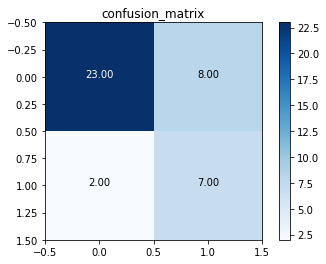

In [87]:
cm=confusion_matrix(y_test,y_pred)
plt.figure()

plot_confusion_matrix(cm,classes=['churn=1','churn=0'],title='confusion_matrix',cmap=plt.cm.Blues)

In [90]:
#Now we will use Classification report
print('classification report',classification_report(y_test,y_pred))

classification report              precision    recall  f1-score   support

          0       0.92      0.74      0.82        31
          1       0.47      0.78      0.58         9

avg / total       0.82      0.75      0.77        40



In [92]:
#Now appying log loss
from sklearn.metrics import log_loss
log_loss(y_test,y_pred_prob)

0.5505367052415259

In [101]:
#Now we are going to use logistic regression model again for different parameter,like solver and regularisation
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01,solver='liblinear')
LR.fit(X_train,y_train)
y_pred=LR.predict_proba(X_test)
print('LogLoss : % .2f' % log_loss(y_test,y_pred))

LogLoss :  0.55


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
#Now we are going to use logistic regression model again for different parameter,like solver and regularisation
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.001,solver='liblinear')
LR.fit(X_train,y_train)
y_pred=LR.predict_proba(X_test)
print('LogLoss : % .2f' % log_loss(y_test,y_pred))

LogLoss :  0.66


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
